# Plot trace extraction example
This notebooks shows an example of how to use the `extract_traces_and_axis` fuction to extract the traces from a plot figures.  
**Note**: This function was developed to extract the traces from the plots processed in the published article, therefore not all plots formats are supported

In [242]:
import sys
import cv2 as cv
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# Install ramanbiolib with extraction tag
#!pip install ramanbiolib[extraction]

In [245]:
from ramanbiolib.db.extraction import extract_traces_and_axis

## Load image
We display the image

In [246]:
plot_img = cv.cvtColor(cv.imread("plot-example.png"), cv.COLOR_BGR2RGB) 

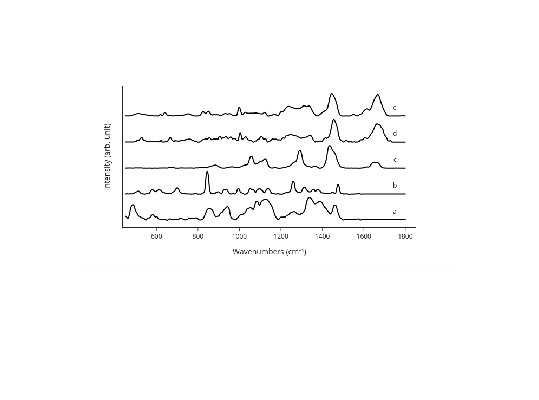

In [247]:
(
    px.imshow(plot_img, height=400, width=700)
    .update_layout(coloraxis_showscale=False, margin=dict(t=5))
    .update_xaxes(showticklabels=False)
    .update_yaxes(showticklabels=False)
)

## Extract traces
For trace extraction, first we need to define the `figure_info` dict, where the image path and the traces names are set.  
The traces names are ordered bottom-up.  
**Note**: A folder named `logs` needs to be created in this notebook folder

In [248]:
figure_info = {
    "image_path": "plot-example.png", 
    "subfigures": [ 
        { "text": "a" }, 
        { "text": "b" }, 
        { "text": "c" }, 
        { "text": "d" }, 
        { "text": "e" }
    ]
}

Then we can call the `extract_traces_and_axis` function with the following paramters:
- **figure_info** : *(dict)*
        The figure information dict in the format: { "image_path": "{path}", "subfigures": [ { "text": "{bottom-trace-name}"}, ...]}
- **threshold** : *(int)*
        The binary threshold value
- **axis_y_ticks** : *(list)*
        The list of the ticks wavenumbers values. If None, OCR is tried for extract the values from the figure.
- **same_contour_axis_trace** : *(bool)*
        A flag to indicate if the bottom trace and axis are overlapping.
- **ticks_down** : *(bool)*
        A flag to indicate if the x-axis ticks are down the axis.
- **prominence_ticks** : *(bool)*
        The minimum prominence used in the x-axis ticks peaks detection. Useful to fine-tune the ticks detection.
- **ignore_first_tick** : *(bool)*
        A flag to indicate if the first tick detected needs to be avoided. Useful in cases where the ticks are over the x-axis and therefore the y-axis can be confused with a tick.        
- **horizontal_crop** : *(int)*
        The horizontal crop min value in pixels. Default 0, no crop. Useful when is necessary to do not consider some region of the plot image.

In [249]:
traces = extract_traces_and_axis(
    figure_info, 
    threshold=180, 
    axis_y_ticks=None,
    same_contour_axis_trace=False, 
    ticks_down=True, 
    prominence_ticks=0.5,
    ignore_first_tick=False, 
    horizontal_crop=0
)
traces_df = pd.concat(traces)

Found 103 contours
Axis countour size: 1659
Axis extracted labels (OCR):
600 800 1000 1200 1400 1600 1800

Wavenumbers (cm)


    
Trace 0 countour size: 1336
Trace 1 countour size: 1331
Trace 2 countour size: 1251
Trace 3 countour size: 1266
Trace 4 countour size: 1268
Processing trace a ...
Wavenumbers
 ticks: [600, 800, 1000, 1200, 1400, 1600, 1800]
 pixels: [141 217 294 370 447 524 600]
x len: 519, y len: 519
Processing trace b ...
Wavenumbers
 ticks: [600, 800, 1000, 1200, 1400, 1600, 1800]
 pixels: [141 217 294 370 447 524 600]
x len: 519, y len: 519
Processing trace c ...
Wavenumbers
 ticks: [600, 800, 1000, 1200, 1400, 1600, 1800]
 pixels: [141 217 294 370 447 524 600]
x len: 519, y len: 519
Processing trace d ...
Wavenumbers
 ticks: [600, 800, 1000, 1200, 1400, 1600, 1800]
 pixels: [141 217 294 370 447 524 600]
x len: 519, y len: 519
Processing trace e ...
Wavenumbers
 ticks: [600, 800, 1000, 1200, 1400, 1600, 1800]
 pixels: [141 217 294 370 447 524 600]
x len: 519, y len: 51

We can display the dataframe with the extracted traces.  

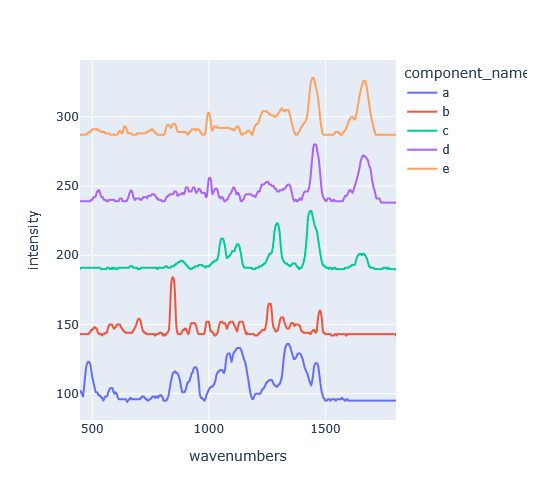

In [250]:
px.line(traces_df, x='wavenumbers', y='intensity', color='component_name', height=500, width=800)

The intensity value is the pixel height in the image. Therefore, min-max normalization can be applied to the intensity values, for each trace, to obtain a normalized intensity.

In [251]:
# Group intensity and wavenumbers by component
grouped_traces_df = (
    pd.DataFrame(traces_df.groupby("component_name")['intensity'].apply(list)).reset_index()
    .merge(
        pd.DataFrame(traces_df.groupby("component_name")['wavenumbers'].apply(list)).reset_index(),
        on='component_name'
    )
)
# Normalize the intensity
grouped_traces_df['intensity'] = grouped_traces_df['intensity'].apply(lambda x: (np.array(x)-np.min(x))/(np.max(x)-np.min(x)))

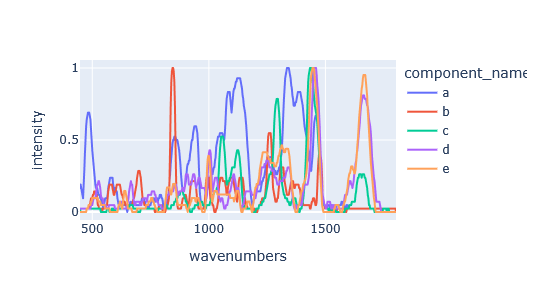

In [252]:
px.line(
    grouped_traces_df.explode(["wavenumbers", "intensity"]), 
    x='wavenumbers', 
    y='intensity', 
    color='component_name', 
    height=300, width=700
)